In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import random

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Create a simple model
model = Sequential([
    Input((28, 28)),
    Flatten(), # need to flatten 28x28 image matrices into vectors
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # softmax output activation for multi-class
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # categorical not binary for multi-class
    metrics=['accuracy']
)

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # Monitor validation loss
    patience=5,               # Number of epochs with no improvement after which to stop
    min_delta=0.001,          # Minimum change to qualify as improvement
    restore_best_weights=True # Restore model weights from the epoch with the best value
)

# Model checkpoint callback to save the best model
checkpoint_filepath = './best_model.keras'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,      # Only save when there's improvement
    mode='min',               # The direction is 'min' for loss
    verbose=1                 # Show progress
)

# TensorBoard callback for visualization
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1          # Update histograms every epoch
)

# Combine callbacks into a list
callbacks = [
    early_stopping,
    model_checkpoint,
    tensorboard_callback
]

In [5]:
# Train the model with callbacks
history = model.fit(
    x_train, y_train,
    epochs=100,                # Set a high number, early stopping will halt training if needed
    batch_size=128,
    validation_split=0.2,     # Use 20% of training data for validation
    callbacks=callbacks,      # Pass the callbacks list here
    verbose=1
)

Epoch 1/100
360/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8211 - loss: 0.6698
Epoch 1: val_loss improved from None to 0.18794, saving model to ./best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8999 - loss: 0.3657 - val_accuracy: 0.9452 - val_loss: 0.1879
Epoch 2/100
358/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.1739
Epoch 2: val_loss improved from 0.18794 to 0.14560, saving model to ./best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9536 - loss: 0.1587 - val_accuracy: 0.9551 - val_loss: 0.1456
Epoch 3/100
366/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1208
Epoch 3: val_loss improved from 0.14560 to 0.12417, saving model to ./best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9662 - loss: 0.1129 - val_accuracy: 0.9617 - val_loss: 0.1242
Epoch 4/100
345/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9725 - loss: 0.0920
Epoch 4: val_loss improved from 0.12417 to 

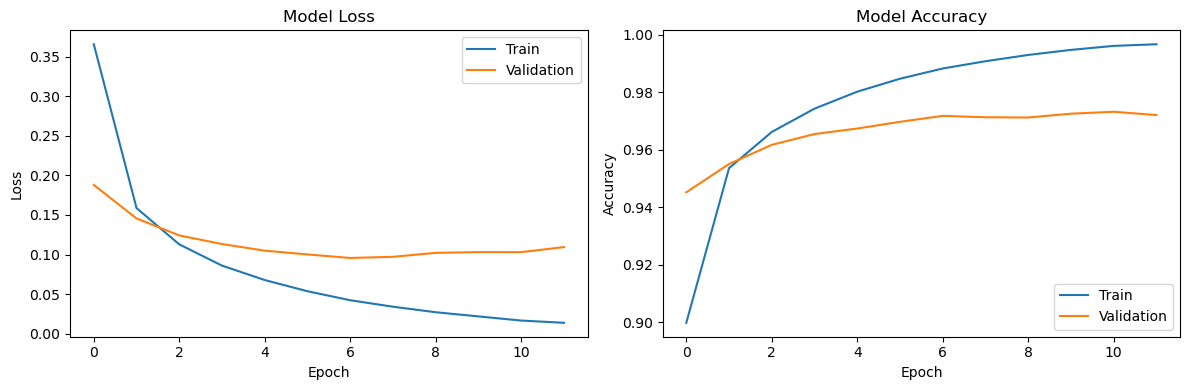

Training stopped at epoch 12


In [6]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

In [7]:
# In your notebook or Python script, run:
%load_ext tensorboard
%tensorboard --logdir=logs/fit

# Alternatively, from a terminal/command prompt:
tensorboard --logdir=logs/fit

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (1296206103.py, line 6)

In [8]:
# Load the best model saved by ModelCheckpoint
best_model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate on test data
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 0s - 795us/step - accuracy: 0.9752 - loss: 0.0853
Test accuracy: 0.9752


In [9]:
# Add a callback to monitor gradient norms
class GradientMonitor(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        grads = self.model.optimizer.get_gradients(self.model.total_loss, self.model.trainable_weights)
        norm = tf.sqrt(sum([tf.reduce_sum(tf.square(g)) for g in grads]))
        print(f"Epoch {epoch}: Gradient norm: {norm}")
        
# Add this to your callbacks list
gradient_monitor = GradientMonitor()
callbacks.append(gradient_monitor)